In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Evaluacion del modelo 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
dataSet = pd.read_excel('Dataset_final.xlsx')

In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  295 non-null    int64  
 1   Nombre                     295 non-null    object 
 2   Apellidos                  295 non-null    object 
 3   Direccción                 295 non-null    object 
 4   Teléfono                   295 non-null    object 
 5   Edad                       295 non-null    int64  
 6   Estatura                   295 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 

In [5]:
dataSet.dropna(inplace=True)

In [6]:
dataSet.drop_duplicates(inplace=True)

In [7]:
dataSet = dataSet.drop(['Documento', 'Nombre', 'Apellidos', 'Direccción', 'Teléfono'], axis=1)
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       294 non-null    int64  
 1   Estatura                   294 non-null    float64
 2   Área de residencia         294 non-null    object 
 3   Tipo colegio               294 non-null    object 
 4   Género                     294 non-null    object 
 5   Estrato                    294 non-null    float64
 6   Nota Matematicas           294 non-null    float64
 7   Nota Lecto Escritura       294 non-null    float64
 8   Apoyo económico de padres  294 non-null    object 
 9   Último grado cursado       294 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 25.3+ KB


In [8]:
dataSet['Apoyo económico de padres'].unique()

array(['No', 'Sí', 'Si'], dtype=object)

In [9]:
dataSet['Apoyo económico de padres'] = np.where(dataSet['Apoyo económico de padres'] == 'No', 0, 1)
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       294 non-null    int64  
 1   Estatura                   294 non-null    float64
 2   Área de residencia         294 non-null    object 
 3   Tipo colegio               294 non-null    object 
 4   Género                     294 non-null    object 
 5   Estrato                    294 non-null    float64
 6   Nota Matematicas           294 non-null    float64
 7   Nota Lecto Escritura       294 non-null    float64
 8   Apoyo económico de padres  294 non-null    int32  
 9   Último grado cursado       294 non-null    float64
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 24.1+ KB


In [10]:
dataSet['Género'].unique()

array(['Femenino', 'Masculino', 'Mascu'], dtype=object)

In [11]:
dataSet['Género'] = np.where(dataSet['Género'] == 'Femenino', 1, 0)
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       294 non-null    int64  
 1   Estatura                   294 non-null    float64
 2   Área de residencia         294 non-null    object 
 3   Tipo colegio               294 non-null    object 
 4   Género                     294 non-null    int32  
 5   Estrato                    294 non-null    float64
 6   Nota Matematicas           294 non-null    float64
 7   Nota Lecto Escritura       294 non-null    float64
 8   Apoyo económico de padres  294 non-null    int32  
 9   Último grado cursado       294 non-null    float64
dtypes: float64(5), int32(2), int64(1), object(2)
memory usage: 23.0+ KB


In [12]:
dataSet['Tipo colegio'].unique()

array(['Público', 'Privado', 'Públic', 'Privad', 'Públi'], dtype=object)

In [13]:
dataSet['Tipo colegio'] = dataSet['Tipo colegio'].replace('Privad', 'Privado')

In [14]:
dataSet['Tipo colegio'] = np.where(dataSet['Tipo colegio'] == 'Privado', 1, 0)
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       294 non-null    int64  
 1   Estatura                   294 non-null    float64
 2   Área de residencia         294 non-null    object 
 3   Tipo colegio               294 non-null    int32  
 4   Género                     294 non-null    int32  
 5   Estrato                    294 non-null    float64
 6   Nota Matematicas           294 non-null    float64
 7   Nota Lecto Escritura       294 non-null    float64
 8   Apoyo económico de padres  294 non-null    int32  
 9   Último grado cursado       294 non-null    float64
dtypes: float64(5), int32(3), int64(1), object(1)
memory usage: 21.8+ KB


In [15]:
dataSet['Área de residencia'].unique()

array(['Urbana', 'Rural', 'Urba', 'Urban'], dtype=object)

In [16]:
dataSet['Área de residencia'] = np.where(dataSet['Área de residencia'] == 'Rural', 1, 0)
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       294 non-null    int64  
 1   Estatura                   294 non-null    float64
 2   Área de residencia         294 non-null    int32  
 3   Tipo colegio               294 non-null    int32  
 4   Género                     294 non-null    int32  
 5   Estrato                    294 non-null    float64
 6   Nota Matematicas           294 non-null    float64
 7   Nota Lecto Escritura       294 non-null    float64
 8   Apoyo económico de padres  294 non-null    int32  
 9   Último grado cursado       294 non-null    float64
dtypes: float64(5), int32(4), int64(1)
memory usage: 20.7 KB


In [17]:
dataSet.describe()

,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,17.683673,1.709150,0.346939,0.418367,0.537415,2.673469,3.431973,3.520408,0.544218,10.098639
std,2.006459,0.065865,0.476808,0.494132,0.499448,1.139806,1.093168,1.047307,0.498890,0.792756
min,15.000000,1.550000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000
25%,16.000000,1.650000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,0.000000,9.000000
50%,17.000000,1.700000,0.000000,0.000000,1.000000,3.000000,3.000000,4.000000,1.000000,10.000000
75%,19.000000,1.750000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,1.000000,11.000000
max,25.000000,1.850000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000,11.000000


In [18]:
matriz = dataSet.corr().abs()

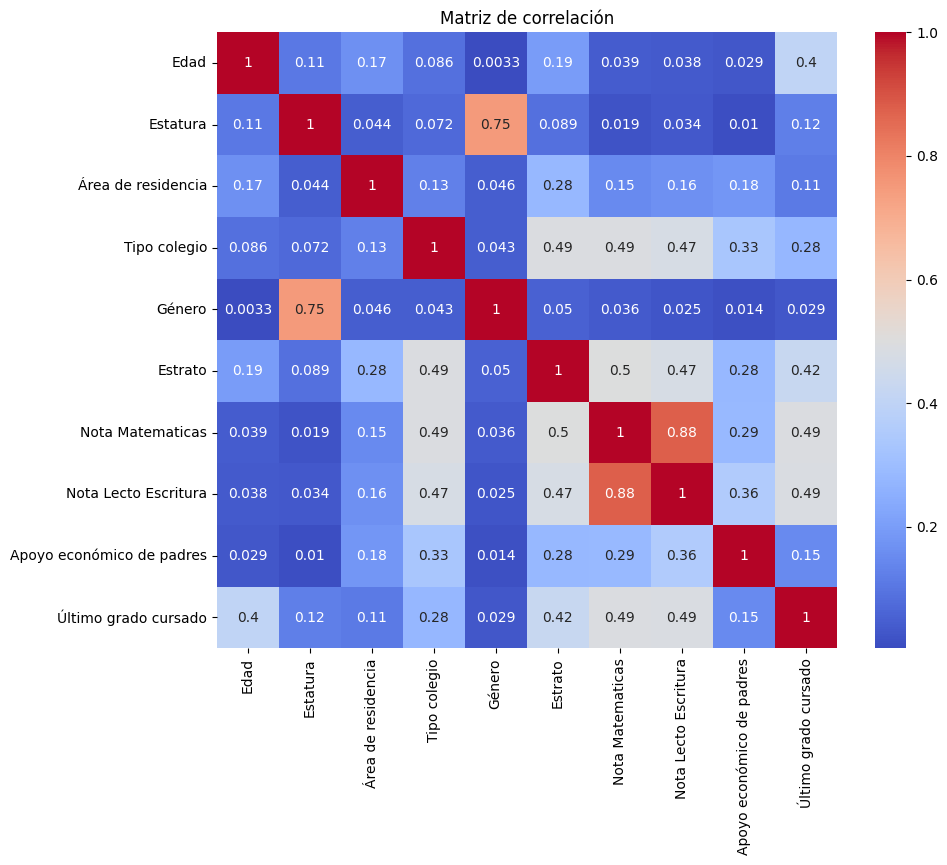

In [19]:
matrizB = matriz.unstack().sort_values(ascending=False).drop_duplicates()

plt.figure(figsize=[10, 8])
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [20]:
for (var1, var2), correlacion in matrizB.items():
    print(f"Entre la variables '{var1}' y {var2} tiene un corelaccion de '{round((correlacion * 100), 2 )}%'")

Entre la variables 'Edad' y Edad tiene un corelaccion de '100.0%'
Entre la variables 'Nota Matematicas' y Nota Lecto Escritura tiene un corelaccion de '87.91%'
Entre la variables 'Estatura' y Género tiene un corelaccion de '74.86%'
Entre la variables 'Estrato' y Nota Matematicas tiene un corelaccion de '49.98%'
Entre la variables 'Tipo colegio' y Nota Matematicas tiene un corelaccion de '49.2%'
Entre la variables 'Estrato' y Tipo colegio tiene un corelaccion de '49.18%'
Entre la variables 'Nota Matematicas' y Último grado cursado tiene un corelaccion de '49.02%'
Entre la variables 'Último grado cursado' y Nota Lecto Escritura tiene un corelaccion de '48.88%'
Entre la variables 'Tipo colegio' y Nota Lecto Escritura tiene un corelaccion de '47.48%'
Entre la variables 'Nota Lecto Escritura' y Estrato tiene un corelaccion de '47.45%'
Entre la variables 'Último grado cursado' y Estrato tiene un corelaccion de '42.48%'
Entre la variables 'Edad' y Último grado cursado tiene un corelaccion de 

In [21]:
dataSet = dataSet.drop(['Edad', 'Área de residencia', 'Tipo colegio', 'Estrato', 'Último grado cursado' ],axis=1)

In [22]:
dataSet.columns = ['Estrato', 'Género', 'Matematicas', 'lecto_escritura', 'apoyo_economico']

In [23]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 294
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Estrato          294 non-null    float64
 1   Género           294 non-null    int32  
 2   Matematicas      294 non-null    float64
 3   lecto_escritura  294 non-null    float64
 4   apoyo_economico  294 non-null    int32  
dtypes: float64(3), int32(2)
memory usage: 11.5 KB


In [24]:
dataSet['promedio'] = (dataSet['Matematicas'] + dataSet['lecto_escritura']) /2
dataSet.describe()

,Estrato,Género,Matematicas,lecto_escritura,apoyo_economico,promedio
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,1.709150,0.537415,3.431973,3.520408,0.544218,3.476190
std,0.065865,0.499448,1.093168,1.047307,0.498890,1.037412
min,1.550000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1.650000,0.000000,3.000000,3.000000,0.000000,3.000000
50%,1.700000,1.000000,3.000000,4.000000,1.000000,3.500000
75%,1.750000,1.000000,4.000000,4.000000,1.000000,4.000000
max,1.850000,1.000000,5.000000,5.000000,1.000000,5.000000


In [27]:
dataSet['riesgo'] = np.where((dataSet['promedio'] <3.5),1,0)

Entrenar el modelo 


In [28]:
variales = ['Matematicas', 'lecto_escritura']
X = dataSet[variales]
y = dataSet['riesgo']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_precidiones = model.predict(X_test)

In [41]:
print('Coeficiente de determinación: %.2f'% r2_score(y_test, y_precidiones))
print('Error cuadratico medio: %.2f'% mean_squared_error(y_test, y_precidiones))

Coeficiente de determinación: 0.66
Error cuadratico medio: 0.08


In [42]:
maat = 3.5 
nlect = 4
apoyo = 1
#Realizar predicion

pred = model.predict([[maat, nlect]])
pred_porcentaje = pred[0] * 100

print(f'Prediccion de Riesgo: {round(pred_porcentaje, 2)}% ')

Prediccion de Riesgo: 30.56% 


C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
import pickle


with open('modelo_registro.pkl', 'wb') as file:
    pickle.dump(model, file)
